# Solving through the normal equation

$ θ=(X^TX)^{−1}X^{T}y $

## Dataset

We are going to be working with the [California Housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) Dataset.

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
print(housing.data[:5])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


## Through sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing.data, housing.target)
print(lr.intercept_)
print(lr.coef_)

-36.94192020718441
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


## Our implementation
$ θ=(X^TX)^{−1}X^{T}y $

In [ ]:
import numpy as np
# adding a virtual first column προσθήκη εικονικής πρώτης στήλης με τιμή 1 για την αποτέμνουσα
data = np.concatenate((np.ones((housing.data.shape[0],1)), housing.data),axis=1)
theta = np.linalg.inv((data.T).dot(data)).dot(data.T).dot(housing.target)
print(theta)

[-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]


## Με χρήση του ψευδοανάστροφου Moore-Penrose

In [ ]:
theta = np.linalg.pinv(data).dot(housing.target)
print(theta)

[-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]


# Gradient Descent / Επικλινής κάθοδος

Θα δημιουργήσουμε τυχαία δεδομένα μίας μεταβλητής εισόδου, μέσω της υπόθεσης $4+3x_1$ με προσθήκη και τυχαίου θορύβου στην μεταβλητή εξόδου. Θα τα εμφανίσουμε με ένα scatter plot. Τέλος θα προσθέσουμε και μια εικονική μεταβλητή εισόδου $x_0$ με τιμή 1 σε όλα τα παραδείγματα για να χειριστούμε ενιαία την αποτέμνουσα και τις υπόλοιπες παραμέτρους.

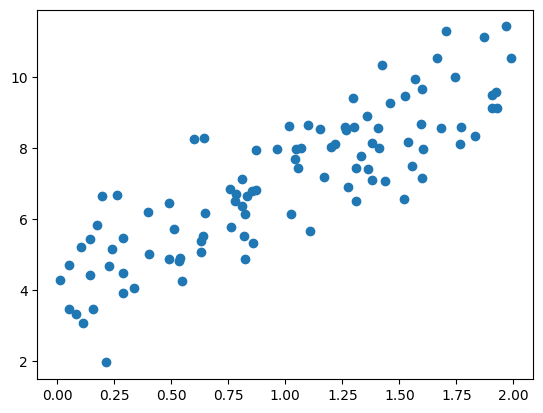

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m = 100

# rand: δισδιάστατος πίνακας m x 1 τυχαίων αριθμών στο [0..1]
x1 = 2 * np.random.rand(m, 1)
# randn: δισδιάστατος πίνακας m x 1 τυχαίων αριθμών κανονικής κατανομής
y = 4 + 3 * x1 + np.random.randn(m, 1)

plt.scatter(x=x1,y=y)

X = np.concatenate((np.ones((m,1)), x1), axis=1)

n = X.shape[1] - 1

Υπερ-παράμετροι

In [ ]:
num_iterations = 400 #40 χιλιάδες για να φανούν οι χρονικές διαφορές
learning_rate = 0.009

## Without linear algebra

Μια πρώτη υλοποίηση

In [ ]:
theta = np.zeros(n+1)
for _ in range(num_iterations):
  theta_temp = theta.copy()
  for j in range(n+1):
    update = 0
    for i in range(m):
      update += (theta_temp.dot(X[i])-y[i][0])*X[i][j]
    theta[j] = theta[j] - learning_rate*(1/m)*update
print(theta)

cost = 0
for i in range(m):
  cost += 0.5*(1/m)*(theta.dot(X[i])-y[i][0])**2
print(cost)

[3.55443171 3.45021579]
0.5754052663192811


Μια λίγο καλύτερη υλοποίηση

In [ ]:
theta = np.zeros(n+1)
for _ in range(num_iterations):
  theta_temp = theta.copy()
  update = np.zeros(n+1)
  for i in range(m):
    error = (theta_temp.dot(X[i])-y[i][0])
    for j in range(n+1):
      update[j] += error*X[i][j]
  for j in range(n+1):
    theta[j] = theta[j] - learning_rate*(1/m)*update[j]
print(theta)

cost = 0
for i in range(m):
  cost += 0.5*(1/m)*((theta.dot(X[i])-y[i][0])**2)
print(cost)

[3.55443171 3.45021579]
0.5754052663192811


## With linear Algebra

Υλοποίηση με γραμμική άλγεβρα

In [ ]:
theta = np.zeros((n+1,1))
for _ in range(num_iterations):
  theta = theta - learning_rate*(1/m)*(X.T @ (X @ theta - y))
print(theta)

cost = 0.5*(1/m)*np.sum((X @ theta - y)**2)
print(cost)

[[3.55443171]
 [3.45021579]]
0.575405266319281


## Σύγκριση με κανονική εξίσωση

In [ ]:
theta_opt = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
print(theta_opt)

cost = 0.5*(1/m)*np.sum((X @ theta_opt - y)**2)
print(cost)

[[4.04765462]
 [3.02912936]]
0.5447251693944533


## Γραφική απεικόνιση της υπόθεσης
Με πράσινο η υπόθεση που βρίσκει η κανονική εξίσωση, και με κόκκινο η υπόθεση που βρίσκει η επικλινής κάθοδος. Αν φανεί μόνο η πράσινη, σημαίνει πως κρύβει από κάτω της την κόκκινη.

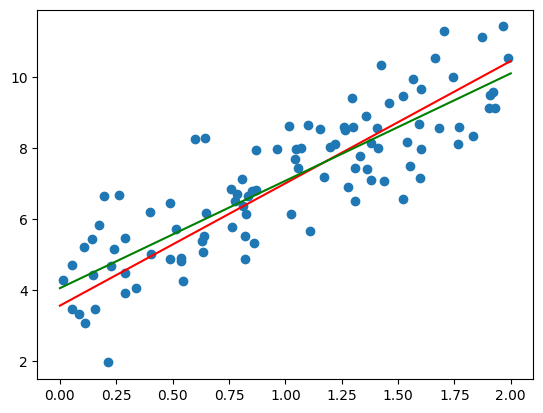

In [ ]:
plt.scatter(x=x1,y=y)
x_values = np.linspace(0, 2, 100)
y_values = theta[0] + theta[1]*x_values
y_values_opt = theta_opt[0] + theta_opt[1]*x_values
plt.plot(x_values, y_values, color='red')
plt.plot(x_values, y_values_opt, color='green')

# Learning Rate / Ρυθμός μάθησης

Συνθετικά δεδομένα

In [ ]:
# Creating random X and y
x1 = 2 * np.random.rand(200, 1)
x2 = 2 * np.random.rand(200, 1)
y = 4 + 3 * x1 + 5 * x2 + np.random.randn(200, 1)
X = np.concatenate((np.ones((x1.shape[0],1)), x1, x2), axis=1)

Εναλλακτικά πραγματικά δεδομένα

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.feature_names)
print(diabetes.data[:5])
print(diabetes.target[:5])
X = np.concatenate((np.ones((diabetes.data.shape[0],1)), diabetes.data), axis=1)
y = diabetes.target

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


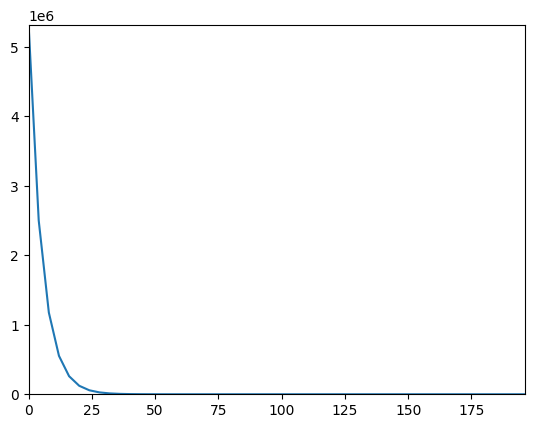

3.8752133670868877e-10
3.2090641931051043e-10
2.6574260629998994e-10
2.6574260629998994e-10
[[ 1.50999999e+02  7.49999995e+01  1.40999999e+02 ...  1.31999999e+02
   2.19999999e+02  5.69999996e+01]
 [-6.05765435e-17  1.01200486e-17  5.91417594e-17 ...  2.48769987e-17
  -1.13907271e-18 -2.40340264e-17]
 [ 2.00053396e-15  8.70231523e-16  1.83621382e-15 ...  1.66320797e-15
   2.84428835e-15  6.06144936e-16]
 ...
 [-8.44277708e-16 -6.55419347e-16 -1.34261031e-15 ... -9.98222481e-16
  -1.43353042e-15 -5.22002413e-16]
 [ 1.38363102e-14  6.97720779e-15  1.31081305e-14 ...  1.22641617e-14
   2.06601714e-14  5.29816647e-15]
 [ 1.67748884e-15  8.16390418e-16  1.57529388e-15 ...  1.53260036e-15
   2.43329261e-15  6.09389224e-16]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Enable interactive mode
plt.ion()

fig, ax = plt.subplots()
x_data, y_data = [], []

#learning_rate = 0.0009 # synthetic slow
#learning_rate = 0.009 # real slow, synthetic ok (good go faster)
learning_rate = 0.09 # real ok (good go faster), synthetic ok
#learning_rate = 0.65 # sythetic diverging
num_iterations = 200
theta = np.zeros((X.shape[1],1))
max_cost = 0
for i in range(num_iterations):
  theta = theta - learning_rate*(1/X.shape[0])*(X.T @ (X @ theta - y))
  cost = 0.5*(1/X.shape[0])*np.sum((X @ theta - y)**2)
  if (cost > max_cost):
    max_cost = cost
  print(cost)


  #if (True):
  if (i % 4 == 0):
    x_data.append(i)
    y_data.append(cost)

    # Clear previous figure
    clear_output(wait=True)

    # Plot new data
    ax.clear()  # Clear ax data
    ax.plot(x_data, y_data)
    ax.set_xlim(0, i)
    ax.set_ylim(0, max_cost)

    # Display the figure
    display(fig)

    plt.pause(0.1)  # Small interval to simulate real-time data plotting

print(cost)
print(theta)

# Κλιμάκωση και προτυποποίηση

Δεδομένα

In [ ]:
# Creating random X and y
x1 = 2 * np.random.rand(200, 1)
x2 = 100 * np.random.rand(200, 1)
y = 4 + 3 * x1 + 5 * x2 + np.random.randn(200, 1)
X = np.concatenate((np.ones((x1.shape[0],1)), x1, x2), axis=1)

Κλιμάκωση

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)
scaler.fit(x2)
x2 = scaler.transform(x2)
y = 4 + 3 * x1 + 5 * x2 + np.random.randn(200, 1)
X = np.concatenate((np.ones((x1.shape[0],1)), x1, x2), axis=1)

Προτυποποίηση

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)
scaler.fit(x2)
x2 = scaler.transform(x2)
y = 4 + 3 * x1 + 5 * x2 + np.random.randn(200, 1)
X = np.concatenate((np.ones((x1.shape[0],1)), x1, x2), axis=1)

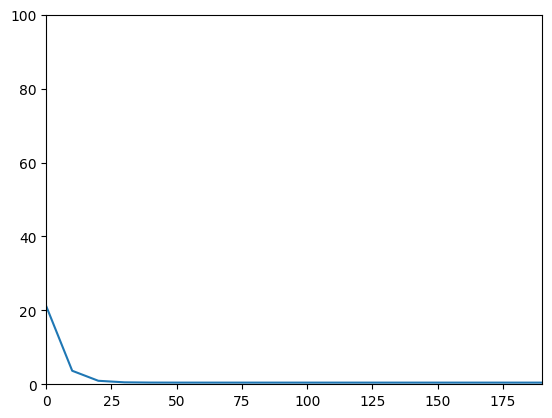

0.44985918941979963
[[3.93667357]
 [3.05136145]
 [5.07218443]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Enable interactive mode
plt.ion()

fig, ax = plt.subplots()
x_data, y_data = [], []


#learning_rate = 0.0009 # without scaling diverge
#learning_rate = 0.00009 # without scaling
learning_rate = 0.09 # with scaling

num_iterations = 200
theta = np.zeros((X.shape[1],1))
for i in range(num_iterations):
  theta = theta - learning_rate*(1/X.shape[0])*(X.T @ (X @ theta - y))
  cost = 0.5*(1/X.shape[0])*np.sum((X @ theta - y)**2)
  if (i == 0):
    cost0 = cost
  #print(cost)

  if (i % 10 == 0):
    x_data.append(i)
    y_data.append(cost)

    # Clear previous figure
    clear_output(wait=True)

    # Plot new data
    ax.clear()  # Clear ax data
    ax.plot(x_data, y_data)
    ax.set_xlim(0, i)
    ax.set_ylim(0, max(100,cost0,cost))

    # Display the figure
    display(fig)

    plt.pause(0.1)  # Small interval to simulate real-time data plotting

print(cost)
print(theta)